# Military Power Clustering Project
-World military power
Source : globalfirepower.com on 1st may 2020

- https://data.world/vizzup/world-military-power/workspace/file?filename=World+military+power.xlsx


# Import Libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
plt.rcParams["figure.figsize"] = (10,6)
import warnings
warnings.filterwarnings('ignore')
#pd.set_option('display.max_rows', 500)

pd.set_option('display.max_rows', 1000)
pd.set_option('display.max_columns', 1000)
pd.set_option('display.width', 1000)

# Ingest Data  

In [2]:
df0 = pd.read_excel("World military power.xlsx",  header=[0,1], index_col=[0])

df0.T

Afghanistan         Albania          Algeria           Angola          Argentina          Armenia           Australia            Austria       Azerbaijan          Bahrain       Bangladesh          Belarus             Belgium          Bhutan          Bolivia  Bosnia and Herzegovina        Botswana             Brazil         Bulgaria    Burkina Faso         Cambodia        Cameroon              Canada  Central African Republic            Chad              Chile               China           Colombia          Croatia             Cuba            Czechia  Democratic Republic of the Congo            Denmark  Dominican Republic          Ecuador            Egypt      El Salvador          Estonia         Ethiopia            Finland              France           Gabon          Georgia             Germany            Ghana             Greece        Guatemala        Honduras            Hungary              India          Indonesia  \
2020 ranking      Military Strength                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                  
2020 ranking      Military Strength Power Index                     1.3444          2.3137           0.4659           0.8379             0.6521           2.1251              0.3225             0.9568           0.9463           1.8547           0.7066           0.8179              1.0499         10.1681           0.9942                  3.8586          2.0582             0.1988           0.8916          1.9009           2.0557          1.9902              0.3712                    3.2889          1.6383             0.7668              0.0691             0.6045           1.0183           1.2208             0.5531                            1.1389             0.7878              2.7504           1.0062           0.1872           3.1291           2.5893           0.8581             0.8498              0.1702          3.3736           1.6679              0.2186           2.0554             0.5311           1.8302          2.0943             0.8215             0.0953             0.2544   
Airforce Strength Aircraft Strength                            Afghanistan         Albania          Algeria           Angola          Argentina          Armenia           Australia            Austria       Azerbaijan          Bahrain       Bangladesh          Belarus             Belgium          Bhutan          Bolivia  Bosnia and Herzegovina        Botswana             Brazil         Bulgaria    Burkina Faso         Cambodia        Cameroon              Canada  Central African Republic            Chad              Chile               China           Colombia          Croatia             Cuba            Czechia  Democratic Republic of the Congo            Denmark  Dominican Republic          Ecuador            Egypt      El Salvador          Estonia         Ethiopia            Finland              France           Gabon          Georgia             Germany            Ghana             Greece        Guatemala        Honduras            Hungary              India          Indonesia   
                  Aircraft Strength value                            26

# EDA

## Implement basic steps to see how is your data looks like

In [3]:
df0.info(verbose=True)

<class 'pandas.core.frame.DataFrame'>
Index: 138 entries, Afghanistan to Zimbabwe
Data columns (total 59 columns):
 #   Column                                                        Non-Null Count  Dtype  
---  ------                                                        --------------  -----  
 0   (2020 ranking, Military Strength Power Index)                 138 non-null    float64
 1   (Airforce Strength, Aircraft Strength)                        138 non-null    object 
 2   (Airforce Strength, Aircraft Strength value)                  138 non-null    float64
 3   (Airforce Strength, Fighter/Interceptor Strength)             138 non-null    object 
 4   (Airforce Strength, Fighter/Interceptor Strength value)       138 non-null    float64
 5   (Airforce Strength, Attack Aircraft Strength)                 138 non-null    object 
 6   (Airforce Strength, Attack Aircraft Strength value)           138 non-null    float64
 7   (Airforce Strength, Transport Aircraft Fleet Strength)       

In [4]:
df0.shape

(138, 59)

## Convert multi index columns to one level

In [5]:
df0 = pd.read_excel("World military power.xlsx",  header=[1])
df0.head()

,Military Strength,Military Strength Power Index,Aircraft Strength,Aircraft Strength value,Fighter/Interceptor Strength,Fighter/Interceptor Strength value,Attack Aircraft Strength,Attack Aircraft Strength value,Transport Aircraft Fleet Strength,Transport Aircraft Fleet Strength value,Trainer Aircraft Fleet,Trainer Aircraft Fleet value,Helicopter Fleet Strength,Helicopter Fleet Strength value,Attack Helicopter Fleet Strength,Attack Helicopter Fleet Strength value,Tank Strength,Tank Strength value,AFV/APC Strength,AFV/APC Strength value,Self-Propelled Artillery Strength,Self-Propelled Artillery Strength value,Towed Artillery Strength,Towed Artillery Strength value,Rocket Projector Strength,Rocket Projector Strength value,Navy Fleet Strengths,Navy Fleet Strengths value,Aircraft Carrier Fleet Strength,Aircraft Carrier Fleet Strength value,Submarine Fleet Strength,Submarine Fleet Strength value,Destroyer Fleet Strength,Destroyer Fleet Strength value,Frigate Fleet Strength,Frigate Fleet Strength value,defense spending budget,defense spending budget value,External Debt,External Debt value,Airport Totals,Airport Totals value,Oil Production,Oil Production value,Oil Consumption,Oil Consumption value,Proven Oil Reserves,Proven Oil Reserves value,Available Manpower,Available Manpower value,Total Population,Total Population value,Total Square Land Area,Total Square Land Area value,Total Coastline Coverage,Total Coastline Coverage value,Total Waterway Coverage,Total Waterway Coverage value,Total Border Coverage,Total Border Coverage value
0,Afghanistan,1.3444,Afghanistan,260.0,Afghanistan,0.0,Afghanistan,25.0,Afghanistan,30.0,Afghanistan,0.0,Afghanistan,187.0,Afghanistan,0.0,Afghanistan,0.0,Afghanistan,1062.0,Afghanistan,0.0,Afghanistan,176.0,Afghanistan,50.0,Afghanistan,0.0,Afghanistan,0.0,Afghanistan,0.0,Afghanistan,0.0,Afghanistan,0.0,Afghanistan,"12,00,00,00,000",Afghanistan,"2,84,00,00,000",Afghanistan,43.0,Afghanistan,0.0,Afghanistan,5500.0,Afghanistan,0.0,Afghanistan,"1,43,25,743",Afghanistan,"3,49,40,837",Afghanistan,"6,52,230",Afghanistan,0.0,Afghanistan,1200.0,Afghanistan,5987.0
1,Albania,2.3137,Albania,19.0,Albania,0.0,Albania,0.0,Albania,0.0,Albania,0.0,Albania,19.0,Albania,0.0,Albania,0.0,Albania,467.0,Albania,0.0,Albania,0.0,Albania,0.0,Albania,38.0,Albania,0.0,Albania,0.0,Albania,0.0,Albania,0.0,Albania,"25,00,00,000",Albania,"9,50,50,00,000",Albania,4.0,Albania,16000.0,Albania,42500.0,Albania,"16,83,00,000",Albania,"15,19,438",Albania,"30,57,220",Albania,28748.0,Albania,362.0,Albania,41.0,Albania,691.0
2,Algeria,0.4659,Algeria,551.0,Algeria,103.0,Algeria,22.0,Algeria,59.0,Algeria,87.0,Algeria,257.0,Algeria,45.0,Algeria,880.0,Algeria,7361.0,Algeria,320.0,Algeria,240.0,Algeria,316.0,Algeria,201.0,Algeria,0.0,Algeria,6.0,Algeria,0.0,Algeria,5.0,Algeria,"13,00,00,00,000",Algeria,"6,26,00,00,000",Algeria,157.0,Algeria,"13,06,000",Algeria,"3,25,000",Algeria,"12,20,00,00,000",Algeria,"2,07,41,263",Algeria,"4,16,57,488",Algeria,"23,81,741",Algeria,998.0,Algeria,0.0,Algeria,6734.0
3,Angola,0.8379,Angola,295.0,Angola,72.0,Angola,18.0,Angola,30.0,Angola,47.0,Angola,126.0,Angola,15.0,Angola,379.0,Angola,595.0,Angola,28.0,Angola,357.0,Angola,115.0,Angola,57.0,Angola,0.0,Angola,0.0,Angola,0.0,Angola,0.0,Angola,"7,00,00,00,000",Angola,"42,08,00,00,000",Angola,176.0,Angola,"16,66,000",Angola,82300.0,Angola,"8,27,30,00,000",Angola,"62,44,205",Angola,"3,03,55,880",Angola,"12,46,700",Angola,1600.0,Angola,1300.0,Angola,5369.0
4,Argentina,0.6521,Argentina,227.0,Argentina,24.0,Argentina,7.0,Argentina,9.0,Argentina,64.0,Argentina,100.0,Argentina,0.0,Argentina,370.0,Argentina,739.0,Argentina,83.0,Argentina,172.0,Argentina,26.0,Argentina,49.0,Argentina,0.0,Argentina,2.0,Argentina,4.0,Argentina,0.0,Argentina,"4,20,00,00,000",Argentina,"2,14,90,00,00,000",Argentina,1138.0,Argentina,"4,79,400",Argentina,"6,85,000",Argentina,"2,18,50,00,000",Argentina,"2,01,79,430",Argentina,"4,46,94,198",Argentina,"27,80,400",Argentina,4989.0,Argentina,11000.0,Argentin

In [6]:
df=df0.copy()

## Detect and drop duplicated columns

In [7]:
k = []
k.append([df.columns[i] for i in range(1,60) if i%2!=0])  

In [8]:
k

[['Military Strength Power Index',
  'Aircraft Strength value',
  'Fighter/Interceptor Strength value',
  'Attack Aircraft Strength value',
  'Transport Aircraft Fleet Strength value',
  'Trainer Aircraft Fleet value',
  'Helicopter Fleet Strength value',
  'Attack Helicopter Fleet Strength value',
  'Tank Strength value',
  'AFV/APC Strength value',
  'Self-Propelled Artillery Strength value',
  'Towed Artillery Strength value',
  'Rocket Projector Strength value',
  'Navy Fleet Strengths value',
  'Aircraft Carrier Fleet Strength value',
  'Submarine Fleet Strength value',
  'Destroyer Fleet Strength value',
  'Frigate Fleet Strength value',
  'defense spending budget value',
  'External Debt value',
  'Airport Totals value',
  'Oil Production value',
  'Oil Consumption value',
  'Proven Oil Reserves value',
  'Available Manpower value',
  'Total Population value',
  'Total Square Land Area value',
  'Total Coastline Coverage value',
  'Total Waterway Coverage value',
  'Total Border

In [9]:
for i in k:
    df1=pd.DataFrame(df[i]) 

In [10]:
df = pd.concat([df["Military Strength"], df1], axis=1)
df

,Military Strength,Military Strength Power Index,Aircraft Strength value,Fighter/Interceptor Strength value,Attack Aircraft Strength value,Transport Aircraft Fleet Strength value,Trainer Aircraft Fleet value,Helicopter Fleet Strength value,Attack Helicopter Fleet Strength value,Tank Strength value,AFV/APC Strength value,Self-Propelled Artillery Strength value,Towed Artillery Strength value,Rocket Projector Strength value,Navy Fleet Strengths value,Aircraft Carrier Fleet Strength value,Submarine Fleet Strength value,Destroyer Fleet Strength value,Frigate Fleet Strength value,defense spending budget value,External Debt value,Airport Totals value,Oil Production value,Oil Consumption value,Proven Oil Reserves value,Available Manpower value,Total Population value,Total Square Land Area value,Total Coastline Coverage value,Total Waterway Coverage value,Total Border Coverage value
0,Afghanistan,1.3444,260.0,0.0,25.0,30.0,0.0,187.0,0.0,0.0,1062.0,0.0,176.0,50.0,0.0,0.0,0.0,0.0,0.0,"12,00,00,00,000","2,84,00,00,000",43.0,0.0,5500.0,0.0,"1,43,25,743","3,49,40,837","6,52,230",0.0,1200.0,5987.0
1,Albania,2.3137,19.0,0.0,0.0,0.0,0.0,19.0,0.0,0.0,467.0,0.0,0.0,0.0,38.0,0.0,0.0,0.0,0.0,"25,00,00,000","9,50,50,00,000",4.0,16000.0,42500.0,"16,83,00,000","15,19,438","30,57,220",28748.0,362.0,41.0,691.0
2,Algeria,0.4659,551.0,103.0,22.0,59.0,87.0,257.0,45.0,880.0,7361.0,320.0,240.0,316.0,201.0,0.0,6.0,0.0,5.0,"13,00,00,00,000","6,26,00,00,000",157.0,"13,06,000","3,25,000","12,20,00,00,000","2,07,41,263","4,16,57,488","23,81,741",998.0,0.0,6734.0
3,Angola,0.8379,295.0,72.0,18.0,30.0,47.0,126.0,15.0,379.0,595.0,28.0,357.0,115.0,57.0,0.0,0.0,0.0,0.0,"7,00,00,00,000","42,08,00,00,000",176.0,"16,66,000",82300.0,"8,27,30,00,000","62,44,205","3,03,55,880","12,46,700",1600.0,1300.0,5369.0
4,Argentina,0.6521,227.0,24.0,7.0,9.0,64.0,100.0,0.0,370.0,739.0,83.0,172.0,26.0,49.0,0.0,2.0,4.0,0.0,"4,20,00,00,000","2,14,90,00,00,000",1138.0,"4,79,400","6,85,000","2,18,50,00,000","2,01,79,430","4,46,94,198","27,80,400",4989.0,11000.0,11968.0
5,Armenia,2.1251,64.0,0.0,9.0,3.0,13.0,37.0,20.0,110.0,748.0,38.0,150.0,68.0,0.0,NaN,NaN,NaN,NaN,"1,38,50,00,000","10,41,00,00,000",11.0,0.0,47500.0,0.0,"16,96,085","30,38,217",29743.0,NaN,0.0,1570.0
6,Australia,0.3225,464.0,82.0,6.0,38.0,174.0,133.0,22.0,59.0,3051.0,0.0,54.0,0.0,48.0,2.0,6.0,2.0,8.0,"26,30,00,00,000","17,14,00,00,00,000",480.0,"2,63,000","10,05,000","1,82,10,00,000","1,08,08,002","2,34,70,145","77,41,220",25760.0,2000.0,NaN
7,Austria,0.9568,120.0,15.0,0.0,11.0,32.0,62.0,0.0,56.0,467.0,33.0,0.0,0.0,0.0,NaN,NaN,NaN,NaN,"3,38,00,00,000","6,30,80,00,00,000",52.0,14260.0,"2,15,000","4,30,00,000","40,17,691","87,93,370",83871.0,NaN,0.0,2524.0
8,Azerbaijan,0.9463,147.0,17.0,12.0,1.0,29.0,88.0,17.0,570.0,1451.0,187.0,227.0,162.0,31.0,0.0,4.0,0.0,1.0,"2,80,50,00,000","17,41,00,00,000",37.0,"7,89,300","1,80,000","7,00,00,00,000","50,42,346","1,00,46,516",86600.0,713.0,0.0,2468.0
9,Bahrain,1.8547,109.0,17.0,0.0,2.0,37.0,65.0,22.0,180.0,843.0,33.0,26.0,17.0,39.0,0.0,0.0,0.0,1.0,"1,41,50,00,000","52,15,00,00,000",4.0,45000.0,55000.0,"12,46,00,000","8,06,505","14,22,659",760.0,161.0,0.0,NaN


In [11]:
df = df.replace(",", "", regex=True)
df

,Military Strength,Military Strength Power Index,Aircraft Strength value,Fighter/Interceptor Strength value,Attack Aircraft Strength value,Transport Aircraft Fleet Strength value,Trainer Aircraft Fleet value,Helicopter Fleet Strength value,Attack Helicopter Fleet Strength value,Tank Strength value,AFV/APC Strength value,Self-Propelled Artillery Strength value,Towed Artillery Strength value,Rocket Projector Strength value,Navy Fleet Strengths value,Aircraft Carrier Fleet Strength value,Submarine Fleet Strength value,Destroyer Fleet Strength value,Frigate Fleet Strength value,defense spending budget value,External Debt value,Airport Totals value,Oil Production value,Oil Consumption value,Proven Oil Reserves value,Available Manpower value,Total Population value,Total Square Land Area value,Total Coastline Coverage value,Total Waterway Coverage value,Total Border Coverage value
0,Afghanistan,1.3444,260.0,0.0,25.0,30.0,0.0,187.0,0.0,0.0,1062.0,0.0,176.0,50.0,0.0,0.0,0.0,0.0,0.0,12000000000,2840000000,43.0,0.0,5500.0,0.0,14325743,34940837,652230,0.0,1200.0,5987.0
1,Albania,2.3137,19.0,0.0,0.0,0.0,0.0,19.0,0.0,0.0,467.0,0.0,0.0,0.0,38.0,0.0,0.0,0.0,0.0,250000000,9505000000,4.0,16000.0,42500.0,168300000,1519438,3057220,28748.0,362.0,41.0,691.0
2,Algeria,0.4659,551.0,103.0,22.0,59.0,87.0,257.0,45.0,880.0,7361.0,320.0,240.0,316.0,201.0,0.0,6.0,0.0,5.0,13000000000,6260000000,157.0,1306000,325000,12200000000,20741263,41657488,2381741,998.0,0.0,6734.0
3,Angola,0.8379,295.0,72.0,18.0,30.0,47.0,126.0,15.0,379.0,595.0,28.0,357.0,115.0,57.0,0.0,0.0,0.0,0.0,7000000000,42080000000,176.0,1666000,82300.0,8273000000,6244205,30355880,1246700,1600.0,1300.0,5369.0
4,Argentina,0.6521,227.0,24.0,7.0,9.0,64.0,100.0,0.0,370.0,739.0,83.0,172.0,26.0,49.0,0.0,2.0,4.0,0.0,4200000000,214900000000,1138.0,479400,685000,2185000000,20179430,44694198,2780400,4989.0,11000.0,11968.0
5,Armenia,2.1251,64.0,0.0,9.0,3.0,13.0,37.0,20.0,110.0,748.0,38.0,150.0,68.0,0.0,NaN,NaN,NaN,NaN,1385000000,10410000000,11.0,0.0,47500.0,0.0,1696085,3038217,29743.0,NaN,0.0,1570.0
6,Australia,0.3225,464.0,82.0,6.0,38.0,174.0,133.0,22.0,59.0,3051.0,0.0,54.0,0.0,48.0,2.0,6.0,2.0,8.0,26300000000,1714000000000,480.0,263000,1005000,1821000000,10808002,23470145,7741220,25760.0,2000.0,NaN
7,Austria,0.9568,120.0,15.0,0.0,11.0,32.0,62.0,0.0,56.0,467.0,33.0,0.0,0.0,0.0,NaN,NaN,NaN,NaN,3380000000,630800000000,52.0,14260.0,215000,43000000,4017691,8793370,83871.0,NaN,0.0,2524.0
8,Azerbaijan,0.9463,147.0,17.0,12.0,1.0,29.0,88.0,17.0,570.0,1451.0,187.0,227.0,162.0,31.0,0.0,4.0,0.0,1.0,2805000000,17410000000,37.0,789300,180000,7000000000,5042346,10046516,86600.0,713.0,0.0,2468.0
9,Bahrain,1.8547,109.0,17.0,0.0,2.0,37.0,65.0,22.0,180.0,843.0,33.0,26.0,17.0,39.0,0.0,0.0,0.0,1.0,1415000000,52150000000,4.0,45000.0,55000.0,124600000,806505,1422659,760.0,161.0,0.0,NaN


In [12]:
df.rename(columns={"Military Strength": 'country'}, inplace=True)

In [13]:
df.info(verbose=True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 138 entries, 0 to 137
Data columns (total 31 columns):
 #   Column                                   Non-Null Count  Dtype  
---  ------                                   --------------  -----  
 0   country                                  138 non-null    object 
 1   Military Strength Power Index            138 non-null    float64
 2   Aircraft Strength value                  138 non-null    float64
 3   Fighter/Interceptor Strength value       138 non-null    float64
 4   Attack Aircraft Strength value           138 non-null    float64
 5   Transport Aircraft Fleet Strength value  138 non-null    float64
 6   Trainer Aircraft Fleet value             138 non-null    float64
 7   Helicopter Fleet Strength value          138 non-null    float64
 8   Attack Helicopter Fleet Strength value   138 non-null    float64
 9   Tank Strength value                      138 non-null    float64
 10  AFV/APC Strength value                   138 non-n

In [14]:
df.columns

Index(['country', 'Military Strength Power Index', 'Aircraft Strength value', 'Fighter/Interceptor Strength value', 'Attack Aircraft Strength value', 'Transport Aircraft Fleet Strength value', 'Trainer Aircraft Fleet value', 'Helicopter Fleet Strength value', 'Attack Helicopter Fleet Strength value', 'Tank Strength value', 'AFV/APC Strength value', 'Self-Propelled Artillery Strength value', 'Towed Artillery Strength value', 'Rocket Projector Strength value', 'Navy Fleet Strengths value', 'Aircraft Carrier Fleet Strength value', 'Submarine Fleet Strength value', 'Destroyer Fleet Strength value', 'Frigate Fleet Strength value', 'defense spending budget value', 'External Debt value', 'Airport Totals value', 'Oil Production value', 'Oil Consumption value', 'Proven Oil Reserves value', 'Available Manpower value', 'Total Population value', 'Total Square Land Area value', 'Total Coastline Coverage value', 'Total Waterway Coverage value', 'Total Border Coverage value'], dtype='object')

In [15]:
df.columns = df.columns.str.lower().str.replace(' ', '_').str.replace(" ","")

In [16]:
df.drop("country", axis=1).columns

Index(['military_strength_power_index', 'aircraft_strength_value', 'fighter/interceptor_strength_value', 'attack_aircraft_strength_value', 'transport_aircraft_fleet_strength_value', 'trainer_aircraft_fleet_value', 'helicopter_fleet_strength_value', 'attack_helicopter_fleet_strength_value', 'tank_strength_value', 'afv/apc_strength_value', 'self-propelled_artillery_strength_value', 'towed_artillery_strength_value', 'rocket_projector_strength_value', 'navy_fleet_strengths_value', 'aircraft_carrier_fleet_strength_value', 'submarine_fleet_strength_value', 'destroyer_fleet_strength_value', 'frigate_fleet_strength_value', 'defense_spending_budget_value', 'external_debt_value', 'airport_totals_value', 'oil_production_value', 'oil_consumption_value', 'proven_oil_reserves_value', 'available_manpower_value', 'total_population_value', 'total_square_land_area_value', 'total_coastline_coverage_value', 'total_waterway_coverage_value', 'total_border_coverage_value'], dtype='object')

In [17]:
df = df.reset_index(drop = True)

In [18]:
df.set_index('country', inplace=True)

In [19]:
df

,military_strength_power_index,aircraft_strength_value,fighter/interceptor_strength_value,attack_aircraft_strength_value,transport_aircraft_fleet_strength_value,trainer_aircraft_fleet_value,helicopter_fleet_strength_value,attack_helicopter_fleet_strength_value,tank_strength_value,afv/apc_strength_value,self-propelled_artillery_strength_value,towed_artillery_strength_value,rocket_projector_strength_value,navy_fleet_strengths_value,aircraft_carrier_fleet_strength_value,submarine_fleet_strength_value,destroyer_fleet_strength_value,frigate_fleet_strength_value,defense_spending_budget_value,external_debt_value,airport_totals_value,oil_production_value,oil_consumption_value,proven_oil_reserves_value,available_manpower_value,total_population_value,total_square_land_area_value,total_coastline_coverage_value,total_waterway_coverage_value,total_border_coverage_value
country,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
Afghanistan,1.3444,260.0,0.0,25.0,30.0,0.0,187.0,0.0,0.0,1062.0,0.0,176.0,50.0,0.0,0.0,0.0,0.0,0.0,12000000000,2840000000,43.0,0.0,5500.0,0.0,14325743,34940837,652230,0.0,1200.0,5987.0
Albania,2.3137,19.0,0.0,0.0,0.0,0.0,19.0,0.0,0.0,467.0,0.0,0.0,0.0,38.0,0.0,0.0,0.0,0.0,250000000,9505000000,4.0,16000.0,42500.0,168300000,1519438,3057220,28748.0,362.0,41.0,691.0
Algeria,0.4659,551.0,103.0,22.0,59.0,87.0,257.0,45.0,880.0,7361.0,320.0,240.0,316.0,201.0,0.0,6.0,0.0,5.0,13000000000,6260000000,157.0,1306000,325000,12200000000,20741263,41657488,2381741,998.0,0.0,6734.0
Angola,0.8379,295.0,72.0,18.0,30.0,47.0,126.0,15.0,379.0,595.0,28.0,357.0,115.0,57.0,0.0,0.0,0.0,0.0,7000000000,42080000000,176.0,1666000,82300.0,8273000000,6244205,30355880,1246700,1600.0,1300.0,5369.0
Argentina,0.6521,227.0,24.0,7.0,9.0,64.0,100.0,0.0,370.0,739.0,83.0,172.0,26.0,49.0,0.0,2.0,4.0,0.0,4200000000,214900000000,1138.0,479400,685000,2185000000,20179430,44694198,2780400,4989.0,11000.0,11968.0
Armenia,2.1251,64.0,0.0,9.0,3.0,13.0,37.0,20.0,110.0,748.0,38.0,150.0,68.0,0.0,NaN,NaN,NaN,NaN,1385000000,10410000000,11.0,0.0,47500.0,0.0,1696085,3038217,29743.0,NaN,0.0,1570.0
Australia,0.3225,464.0,82.0,6.0,38.0,174.0,133.0,22.0,59.0,3051.0,0.0,54.0,0.0,48.0,2.0,6.0,2.0,8.0,26300000000,1714000000000,480.0,263000,1005000,1821000000,10808002,23470145,7741220,25760.0,2000.0,NaN
Austria,0.9568,120.0,15.0,0.0,11.0,32.0,62.0,0.0,56.0,467.0,33.0,0.0,0.0,0.0,NaN,NaN,NaN,NaN,3380000000,630800000000,52.0,14260.0,215000,43000000,4017691,8793370,83871.0,NaN,0.0,2524.0
Azerbaijan,0.9463,147.0,17.0,12.0,1.0,29.0,88.0,17.0,570.0,1451.0,187.0,227.0,162.0,31.0,0.0,4.0,0.0,1.0,2805000000,17410000000,37.0,789300,180000,7000000000,5042346,10046516,86600.0,713.0,0.0,2468.0


In [20]:
for col in df.columns:
    if df.dtypes[col] == np.object:
        df[col] = df[col].apply(lambda x : str(x) if type(x) != np.int else x).astype("float")

In [21]:
df = df.reset_index(drop = False)

In [22]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 138 entries, 0 to 137
Data columns (total 31 columns):
 #   Column                                   Non-Null Count  Dtype  
---  ------                                   --------------  -----  
 0   country                                  138 non-null    object 
 1   military_strength_power_index            138 non-null    float64
 2   aircraft_strength_value                  138 non-null    float64
 3   fighter/interceptor_strength_value       138 non-null    float64
 4   attack_aircraft_strength_value           138 non-null    float64
 5   transport_aircraft_fleet_strength_value  138 non-null    float64
 6   trainer_aircraft_fleet_value             138 non-null    float64
 7   helicopter_fleet_strength_value          138 non-null    float64
 8   attack_helicopter_fleet_strength_value   138 non-null    float64
 9   tank_strength_value                      138 non-null    float64
 10  afv/apc_strength_value                   138 non-n

## Check for missing values 

In [23]:
df.isnull().any()

country                                    False
military_strength_power_index              False
aircraft_strength_value                    False
fighter/interceptor_strength_value         False
attack_aircraft_strength_value             False
transport_aircraft_fleet_strength_value    False
trainer_aircraft_fleet_value               False
helicopter_fleet_strength_value            False
attack_helicopter_fleet_strength_value     False
tank_strength_value                        False
afv/apc_strength_value                     False
self-propelled_artillery_strength_value    False
towed_artillery_strength_value             False
rocket_projector_strength_value            False
navy_fleet_strengths_value                  True
aircraft_carrier_fleet_strength_value       True
submarine_fleet_strength_value              True
destroyer_fleet_strength_value              True
frigate_fleet_strength_value                True
defense_spending_budget_value              False
external_debt_value 

In [24]:
df.isnull().sum()

country                                     0
military_strength_power_index               0
aircraft_strength_value                     0
fighter/interceptor_strength_value          0
attack_aircraft_strength_value              0
transport_aircraft_fleet_strength_value     0
trainer_aircraft_fleet_value                0
helicopter_fleet_strength_value             0
attack_helicopter_fleet_strength_value      0
tank_strength_value                         0
afv/apc_strength_value                      0
self-propelled_artillery_strength_value     0
towed_artillery_strength_value              0
rocket_projector_strength_value             0
navy_fleet_strengths_value                 14
aircraft_carrier_fleet_strength_value      23
submarine_fleet_strength_value             23
destroyer_fleet_strength_value             23
frigate_fleet_strength_value               23
defense_spending_budget_value               0
external_debt_value                         0
airport_totals_value              

## Deal with missing values 
* Hint-1, use wikipedia to fill in missing values ​​comparing with similar countries
* Hint-2, Georeferences of countries can help you

<Figure size 288x432 with 0 Axes>

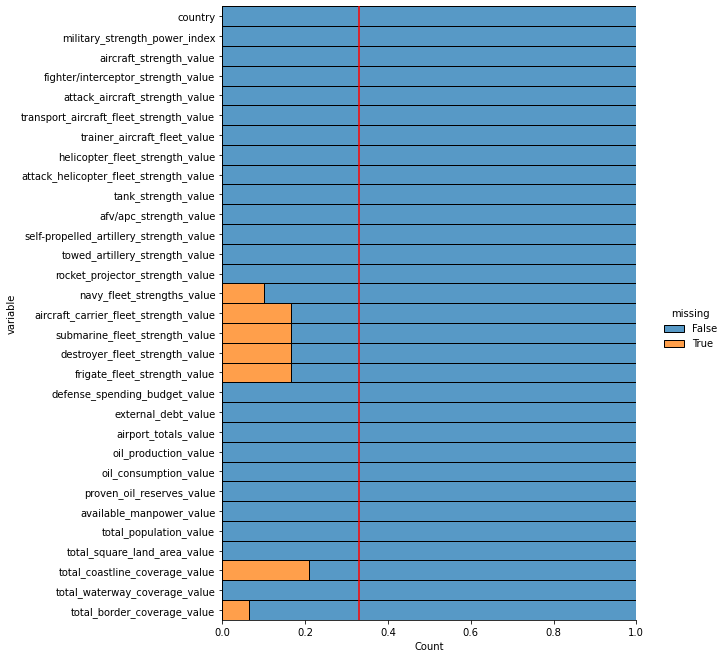

In [25]:
plt.figure(figsize=(4,6))

sns.displot(
    data=df.isnull().melt(value_name="missing"),
    y="variable",
    hue="missing",
    multiple="fill",
    height=9.25
)

plt.axvline(0.33, color="r");

In [26]:
df[~df["total_coastline_coverage_value"].notna()]

,country,military_strength_power_index,aircraft_strength_value,fighter/interceptor_strength_value,attack_aircraft_strength_value,transport_aircraft_fleet_strength_value,trainer_aircraft_fleet_value,helicopter_fleet_strength_value,attack_helicopter_fleet_strength_value,tank_strength_value,afv/apc_strength_value,self-propelled_artillery_strength_value,towed_artillery_strength_value,rocket_projector_strength_value,navy_fleet_strengths_value,aircraft_carrier_fleet_strength_value,submarine_fleet_strength_value,destroyer_fleet_strength_value,frigate_fleet_strength_value,defense_spending_budget_value,external_debt_value,airport_totals_value,oil_production_value,oil_consumption_value,proven_oil_reserves_value,available_manpower_value,total_population_value,total_square_land_area_value,total_coastline_coverage_value,total_waterway_coverage_value,total_border_coverage_value
5,Armenia,2.1251,64.0,0.0,9.0,3.0,13.0,37.0,20.0,110.0,748.0,38.0,150.0,68.0,0.0,NaN,NaN,NaN,NaN,1.385000e+09,1.041000e+10,11.0,0.0,47500.0,0.000000e+00,1696085.0,3038217.0,29743.0,NaN,0.0,1570.0
7,Austria,0.9568,120.0,15.0,0.0,11.0,32.0,62.0,0.0,56.0,467.0,33.0,0.0,0.0,0.0,NaN,NaN,NaN,NaN,3.380000e+09,6.308000e+11,52.0,14260.0,215000.0,4.300000e+07,4017691.0,8793370.0,83871.0,NaN,0.0,2524.0
11,Belarus,0.8179,202.0,39.0,68.0,4.0,28.0,63.0,21.0,532.0,1560.0,482.0,228.0,238.0,0.0,NaN,NaN,NaN,NaN,6.237028e+08,3.992000e+10,65.0,32000.0,190000.0,1.980000e+08,4982905.0,9527543.0,207600.0,NaN,2500.0,3599.0
13,Bhutan,10.1681,2.0,0.0,0.0,0.0,0.0,2.0,0.0,0.0,27.0,0.0,0.0,0.0,0.0,NaN,NaN,NaN,NaN,2.512000e+07,2.671000e+09,2.0,0.0,2000.0,0.000000e+00,176808.0,766397.0,38394.0,NaN,0.0,1136.0
14,Bolivia,0.9942,69.0,0.0,0.0,14.0,23.0,38.0,0.0,54.0,137.0,0.0,86.0,0.0,173.0,0.0,0.0,0.0,0.0,6.600000e+08,1.281000e+10,855.0,59330.0,60000.0,2.115000e+08,5075416.0,11306341.0,1098581.0,NaN,10000.0,7252.0
16,Botswana,2.0582,45.0,10.0,0.0,11.0,8.0,16.0,0.0,55.0,245.0,0.0,30.0,20.0,NaN,NaN,NaN,NaN,NaN,4.500000e+08,2.187000e+09,74.0,0.0,16500.0,0.000000e+00,962617.0,2249104.0,581730.0,NaN,0.0,4347.0
19,Burkina Faso,1.9009,16.0,0.0,3.0,1.0,4.0,8.0,2.0,0.0,350.0,0.0,0.0,0.0,NaN,NaN,NaN,NaN,NaN,1.300000e+08,3.056000e+09,23.0,0.0,10500.0,0.000000e+00,7800000.0,19742715.0,274200.0,NaN,0.0,3611.0
23,Central African Republic,3.2889,3.0,0.0,0.0,2.0,0.0,1.0,0.0,4.0,55.0,0.0,20.0,0.0,NaN,NaN,NaN,NaN,NaN,2.000000e+07,7.799000e+08,39.0,0.0,4500.0,0.000000e+00,2348581.0,5745062.0,622984.0,NaN,2800.0,5920.0
24,Chad,1.6383,35.0,0.0,6.0,6.0,4.0,17.0,3.0,60.0,372.0,10.0,51.0,10.0,NaN,NaN,NaN,NaN,NaN,2.000000e+08,1.724000e+09,59.0,128000.0,100000.0,1.500000e+09,6030834.0,15833116.0,1284000.0,NaN,0.0,6406.0
30,Czechia,0.5531,95.0,12.0,16.0,8.0,15.0,44.0,15.0,116.0,682.0,86.0,85.0,0.0,NaN,NaN,NaN,NaN,NaN,2.969000e+09,2.052000e+11,128.0,2000.0,200000.0,1.500000e+07,5011174.0,10686269.0,78867.0,NaN,664.0,2046.0


In [27]:
df.loc[~df["total_coastline_coverage_value"].notna(), 
             ["country","navy_fleet_strengths_value","aircraft_carrier_fleet_strength_value",
              "submarine_fleet_strength_value","destroyer_fleet_strength_value",
               "frigate_fleet_strength_value"]]

,country,navy_fleet_strengths_value,aircraft_carrier_fleet_strength_value,submarine_fleet_strength_value,destroyer_fleet_strength_value,frigate_fleet_strength_value
5,Armenia,0.0,NaN,NaN,NaN,NaN
7,Austria,0.0,NaN,NaN,NaN,NaN
11,Belarus,0.0,NaN,NaN,NaN,NaN
13,Bhutan,0.0,NaN,NaN,NaN,NaN
14,Bolivia,173.0,0.0,0.0,0.0,0.0
16,Botswana,NaN,NaN,NaN,NaN,NaN
19,Burkina Faso,NaN,NaN,NaN,NaN,NaN
23,Central African Republic,NaN,NaN,NaN,NaN,NaN
24,Chad,NaN,NaN,NaN,NaN,NaN
30,Czechia,NaN,NaN,NaN,NaN,NaN


In [28]:
df.loc[~df["total_coastline_coverage_value"].notna(), 
             ["aircraft_carrier_fleet_strength_value",
              "submarine_fleet_strength_value","destroyer_fleet_strength_value",
               "frigate_fleet_strength_value"]] = 0

In [29]:
df.loc[~df["total_coastline_coverage_value"].notna(), 
             ["country","navy_fleet_strengths_value"]]

,country,navy_fleet_strengths_value
5,Armenia,0.0
7,Austria,0.0
11,Belarus,0.0
13,Bhutan,0.0
14,Bolivia,173.0
16,Botswana,NaN
19,Burkina Faso,NaN
23,Central African Republic,NaN
24,Chad,NaN
30,Czechia,NaN


In [30]:
df.loc[~df["total_coastline_coverage_value"].notna(), 
             ["navy_fleet_strengths_value"]] = 0

<Figure size 288x432 with 0 Axes>

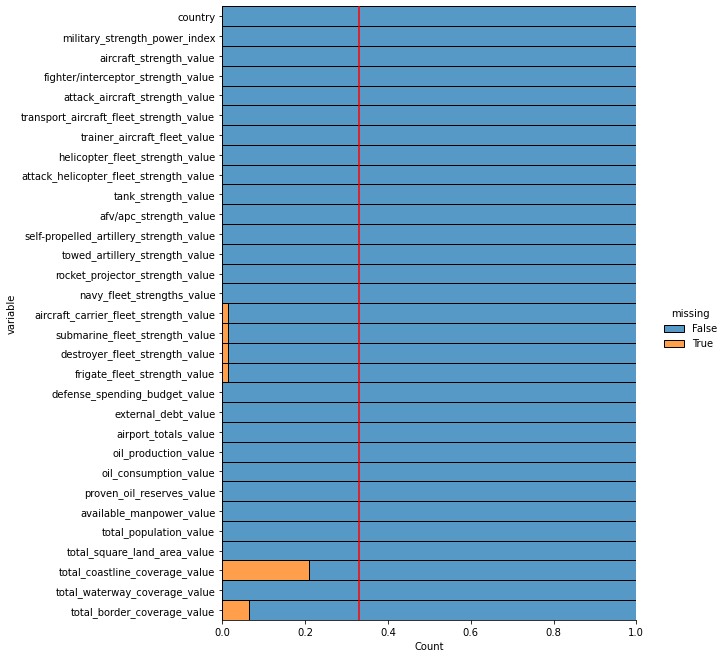

In [31]:
plt.figure(figsize=(4,6))

sns.displot(
    data=df.isnull().melt(value_name="missing"),
    y="variable",
    hue="missing",
    multiple="fill",
    height=9.25
)

plt.axvline(0.33, color="r");

In [32]:
df.loc[~df["aircraft_carrier_fleet_strength_value"].notna(), 
             ["country", "submarine_fleet_strength_value","destroyer_fleet_strength_value",
               "frigate_fleet_strength_value"]]

,country,submarine_fleet_strength_value,destroyer_fleet_strength_value,frigate_fleet_strength_value
110,South Korea,NaN,NaN,NaN
132,Uzbekistan,NaN,NaN,NaN


In [33]:
df.loc[df["country"] == "Uzbekistan",'aircraft_carrier_fleet_strength_value'] = 0
df.loc[df["country"] == "Uzbekistan",'submarine_fleet_strength_value'] = 0
df.loc[df["country"] == "Uzbekistan",'destroyer_fleet_strength_value'] = 0
df.loc[df["country"] == "Uzbekistan",'frigate_fleet_strength_value'] = 0

In [34]:
df.loc[df["country"] == "South Korea",'aircraft_carrier_fleet_strength_value'] = 2
df.loc[df["country"] == "South Korea",'submarine_fleet_strength_value'] = 22
df.loc[df["country"] == "South Korea",'destroyer_fleet_strength_value'] = 12
df.loc[df["country"] == "South Korea",'frigate_fleet_strength_value'] = 18

<Figure size 288x432 with 0 Axes>

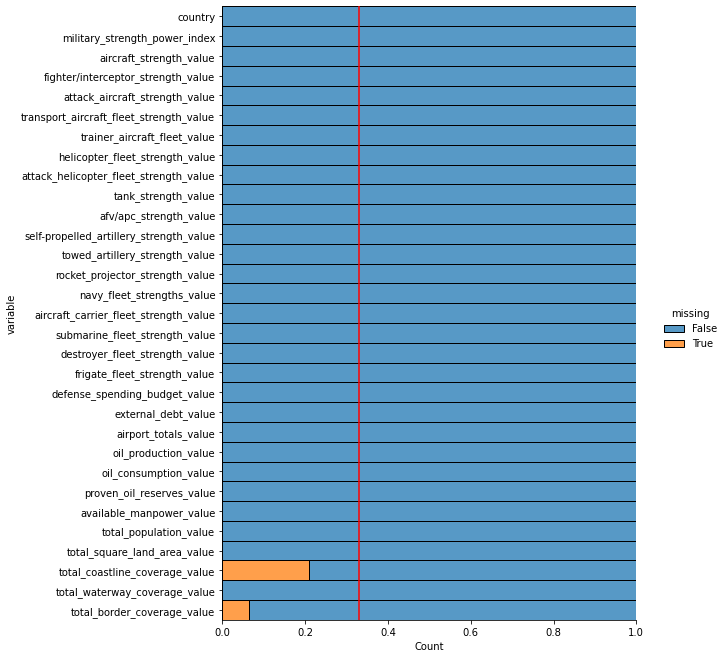

In [35]:
plt.figure(figsize=(4,6))

sns.displot(
    data=df.isnull().melt(value_name="missing"),
    y="variable",
    hue="missing",
    multiple="fill",
    height=9.25
)

plt.axvline(0.33, color="r");

In [37]:
df[["country","total_coastline_coverage_value"]]

,country,total_coastline_coverage_value
0,Afghanistan,0.0
1,Albania,362.0
2,Algeria,998.0
3,Angola,1600.0
4,Argentina,4989.0
5,Armenia,NaN
6,Australia,25760.0
7,Austria,NaN
8,Azerbaijan,713.0
9,Bahrain,161.0


In [38]:
df.loc[~df["total_coastline_coverage_value"].notna(), ["country"]]
# ülkelerin sahil sınırlarının olmadığını https://www.globalfirepower.com/coastline-coverage.php teyit etim ve bunlara 0 atadım.

,country
5,Armenia
7,Austria
11,Belarus
13,Bhutan
14,Bolivia
16,Botswana
19,Burkina Faso
23,Central African Republic
24,Chad
30,Czechia


In [39]:
df.loc[~df["total_coastline_coverage_value"].notna(), ["total_coastline_coverage_value"]] = 0

In [42]:
df.loc[~df["total_border_coverage_value"].notna(), 
                     ["country", "total_border_coverage_value" ]]

,country,total_border_coverage_value
6,Australia,NaN
9,Bahrain,NaN
57,Japan,NaN
69,Madagascar,NaN
83,New Zealand,NaN
95,Philippines,NaN
105,Singapore,NaN
113,Sri Lanka,NaN
119,Taiwan,NaN


In [40]:
df.isnull().sum()

country                                    0
military_strength_power_index              0
aircraft_strength_value                    0
fighter/interceptor_strength_value         0
attack_aircraft_strength_value             0
transport_aircraft_fleet_strength_value    0
trainer_aircraft_fleet_value               0
helicopter_fleet_strength_value            0
attack_helicopter_fleet_strength_value     0
tank_strength_value                        0
afv/apc_strength_value                     0
self-propelled_artillery_strength_value    0
towed_artillery_strength_value             0
rocket_projector_strength_value            0
navy_fleet_strengths_value                 0
aircraft_carrier_fleet_strength_value      0
submarine_fleet_strength_value             0
destroyer_fleet_strength_value             0
frigate_fleet_strength_value               0
defense_spending_budget_value              0
external_debt_value                        0
airport_totals_value                       0
oil_produc

In [ ]:
uüu

In [ ]:
df.loc[df['total_border_coverage_value'].isnull(), 
                      'total_border_coverage_value' ] = 0

In [ ]:
df.drop(['total_square_land_area_value',
               'total_coastline_coverage_value',
               'total_waterway_coverage_value',
               'total_border_coverage_value'], axis=1, inplace=True)

In [ ]:
sns.pairplot(value_df, palette="inferno", corner=True);

In [ ]:
for col in df.columns:
    plt.figure(figsize = (22,6))
    sns.barplot(y = df[col], x = df.index, data = df)
    plt.xticks(rotation = 45);

In [ ]:
df.iplot(kind='hist');

In [ ]:
for i in df:
    df[i].iplot(kind="box", title=i, boxpoints="all", color='lightseagreen')

In [ ]:
fig = px.imshow(df.corr(), aspect='auto')
fig.show()

In [ ]:
df.describe().T.style.background_gradient(subset=['mean','std','50%','count'], cmap='RdPu')

## Fix the dtypes

## Drop the features that not affect military power
* Hint-1,  Georeferences not proper features

## Visualy inspect the some features

## Decriptive statistics

# Data Preprocessing

In [ ]:
X = df.drop(["country"], axis=1).copy()
X.head()

In [ ]:
X.shape

# Modelling

## Hopkins Test 
#### Assess the clusterability of a dataset. A score between 0 and 1, a score around 0.5 express no clusterability, a score tending to 1 express an uniform distrubution so clustering can't be useful and  0 express  not an uniform distrubution hence clusterering can be useful.

In [ ]:
X = X.drop("Classes", axis =1)

In [ ]:
from pyclustertend import hopkins

In [ ]:
X.shape

In [ ]:
hopkins(X, X.shape[0]) 

In [ ]:
hopkins(X, 60)

## Clustering with K-means

In [ ]:
from sklearn.cluster import KMeans

K_means_model = KMeans(n_clusters=5, random_state=42)

In [ ]:
K_means_model.fit_predict(X)  

In [ ]:
X["Classes"] = K_means_model.labels_

### Elbow Method 
### We use this method to find optimal k value by looking up to break point of graph. 

In [ ]:
ssd = []

K = range(2,10)

for k in K:
    model = KMeans(n_clusters =k, random_state=42)
    model.fit(X)
    ssd.append(model.inertia_)

In [ ]:
plt.plot(K, ssd, "bo-")
plt.xlabel("Different k values")
plt.ylabel("inertia-error") 
plt.title("elbow method") 

In [ ]:
df_diff =pd.DataFrame(-pd.Series(ssd).diff()).rename(index = lambda x : x+1)
df_diff

In [ ]:
from yellowbrick.cluster import KElbowVisualizer

model_ = KMeans(random_state=42)
visualizer = KElbowVisualizer(model_, k=(2,9))

visualizer.fit(X)        # Fit the data to the visualizer
visualizer.show();

In [ ]:
from sklearn.metrics import silhouette_score

In [ ]:
silhouette_score(X, K_means_model.labels_)

In [ ]:
range_n_clusters = range(2,9)
for num_clusters in range_n_clusters:
    # intialise kmeans
    kmeans = KMeans(n_clusters=num_clusters, random_state=42)
    kmeans.fit(X)
    cluster_labels = kmeans.labels_
    # silhouette score
    silhouette_avg = silhouette_score(X, cluster_labels)
    print(f"For n_clusters={num_clusters}, the silhouette score is {silhouette_avg}")

In [ ]:
from sklearn.cluster import KMeans

from yellowbrick.cluster import SilhouetteVisualizer

model3 = KMeans(n_clusters=3, random_state=42)
visualizer = SilhouetteVisualizer(model3)

visualizer.fit(X)    # Fit the data to the visualizer
visualizer.poof();

### Model Building and label visualisation

In [ ]:
model = KMeans(n_clusters =3, random_state=42)
model.fit_predict(X)

In [ ]:
clusters = model.labels_

In [ ]:
X["predicted_clusters"] = clusters

In [ ]:
labels = pd.read_csv("label.csv")
labels

In [ ]:
X["labels"] = labels

In [ ]:
ct = pd.crosstab(X.predicted_clusters, X.labels)  # sola tahminleri sağa ise gerçek değerleri giriyoruz.
ct

In [ ]:
from sklearn.metrics import adjusted_rand_score

In [ ]:
adjusted_rand_score(X.labels, X.predicted_clusters) 

In [ ]:
X_labels = X.labels.map({"versicolor":0, "setosa":1,"virginica":2})
X_labels

In [ ]:
plt.figure(figsize = (20,6))

plt.subplot(121)
plt.scatter(X["sepal_length"], X["sepal_width"], c = X_labels, cmap = "viridis", alpha=0.7)
plt.title("Actual")

plt.subplot(122)
plt.scatter(X["sepal_length"], X["sepal_width"], c = X.predicted_clusters, cmap = "viridis", alpha=0.7)
plt.title("Predicted");

In [ ]:
centers = model.cluster_centers_  # her feature ait her clusterın centroidin koordinatlarını veriyor.
centers

In [ ]:
plt.scatter(X["sepal_length"], X["sepal_width"], c = X.predicted_clusters, cmap = "viridis", alpha=0.7)
plt.scatter(centers[:, 0], centers[:, 1], c='black', s=200, alpha=0.5)

In [ ]:
clus_pred = X.iloc[:, :-1].groupby("predicted_clusters").mean().T
clus_pred

In [ ]:
sns.lineplot(data = clus_pred)

In [ ]:
plt.scatter(X["petal_length"], X["petal_width"], c = X.predicted_clusters, cmap = "viridis", alpha =0.7)
plt.scatter(centers[:, 2], centers[:, 3], c='black', s=200, alpha=0.5)

### Evaluate 

## Hierarchical Clustering

### Dendogram

### Model Building and label visualisation

### Evaluate 